## Team 13 Xanadu Challenge
### Ticket to Abu Dabi (TTAB)
- Brett Widholm
- Dan Johnson
- Landon Holcomb
- Solomon Ellis-Summers

This challenge focuses on developing a method to calculate the spectral gap—the energy difference between a material's ground state and first excited state. The spectral gap is crucial for predicting the behavior of materials like silicon, which plays a fundamental role in industries such as electronics and semiconductors.

Accurately calculating the spectral gap in silicon helps in understanding its electronic properties, essential for designing more efficient transistors, solar cells, and integrated circuits. Silicon's properties are highly dependent on its spectral gap, which affects its conductivity and performance in various devices.

You can develop a method using hybrid classical-quantum algorithms or fully quantum approaches to calculate the spectral gap. Techniques could include short quantum circuits for approximations or fault-tolerant quantum computing for more precision. Results should be compared to baseline values from existing literature to evaluate accuracy.

This challenge has wide applications, particularly in improving silicon-based electronics and photovoltaic systems, which are critical for advancing technology and renewable energy solutions. You are encouraged to find an efficient, scalable, and accurate method while leveraging resources like the PennyLane datasets to support your approach.

### Quantum Simulation Setup for Molecular Excitations Using UCCSD
This code utilizes a quantum computing framework to model a molecular system, focusing on the hydrogen molecule (H₂). It starts by specifying the molecular symbols and their atomic coordinates in 3D space, setting up the geometry for quantum chemical calculations. The code then loads a dataset for H₂ to retrieve its Hamiltonian and determine the number of qubits required for the simulation.

Next, the code calculates single and double excitations, which are important for simulating electron interactions in quantum chemistry. These excitations are mapped to the qubits that the unitary coupled-cluster (UCCSD) circuit will act upon, enabling the simulation of electron correlation.

The code also prepares the Hartree-Fock state, which is the starting point for many quantum chemistry calculations. It is generated based on the number of electrons and qubits in the system.

In summary, this code sets up the quantum model of a molecule, calculates electron excitations, and initializes a quantum state for further simulations in quantum chemistry.

In [1]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np

symbals = ['H','H']
geometry = np.array([[0,0,-0.6614],[0,0,0.6614]])

dataset = qml.data.load('qchem', molname="H2")[0]
H, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)
print("Number of qubits = ", qubits)
#print("The Hamiltonian is ", H)
electrons = 2

# Generate single and double excitations
singles, doubles = qml.qchem.excitations(electrons, qubits)


# Map excitations to the wires the UCCSD circuit will act on
s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

hf = qml.qchem.hf_state(electrons, qubits) #this will give you the hf state when given the number of electrons and number of qubits
print(hf)

Number of qubits =  4
[1 1 0 0]


### Quantum Circuit and VQE Optimization for Ground State Energy Calculation

Summary: This code sets up a quantum device to simulate the molecular ground state energy using a variational quantum eigensolver (VQE) approach. First, a quantum device is defined using the lightning.qubit backend. The circuit function applies a UCCSD (unitary coupled-cluster) ansatz to simulate molecular excitations using precomputed parameters for single and double electron excitations.

The cost function evaluates the expectation value of the Hamiltonian (ground state energy) by running the quantum circuit on the device. The initial energy is calculated with zeroed parameters, acting as a starting point.

Next, the code performs a VQE optimization to minimize the energy using the SPSA optimizer. Over a series of iterations, the parameters of the quantum circuit are updated to find the lowest energy configuration, representing the molecule's ground state. The final optimized energy is printed.

In [2]:
#define the device
dev = qml.device("lightning.qubit", wires=qubits)


def circuit(params, wires, s_wires, d_wires, hf):
    qml.UCCSD(params, wires, s_wires, d_wires, hf)
    #return qml.expval(H)

params = np.zeros(len(singles) + len(doubles))

@qml.qnode(dev)
def cost_fn(params):
    circuit(params, wires=range(qubits), s_wires=s_wires, d_wires=d_wires, hf = hf)
    return qml.expval(H)

initial_energy = cost_fn(params)
print("initial energy: ", initial_energy)

# Perform VQE optimization to find the ground state energy
max_iterations = 1000
opt = qml.SPSAOptimizer(maxiter=max_iterations)

for i in range(max_iterations):
    params, energy = opt.step_and_cost(cost_fn, params)
print(energy)

initial energy:  -1.1166511627456917
-1.1372628255272066


### Generating and Inspecting Molecular Hamiltonian for Hydrogen Molecule

Summary: This code sets up a simulation for the hydrogen molecule (H₂) by generating its molecular Hamiltonian, which is essential for quantum chemistry calculations. The bond length of the molecule is specified, and the symbols and Cartesian coordinates are defined to represent the atomic structure. Using these, the Hamiltonian is computed with the STO-3G basis set and zero charge.

The Hamiltonian, which contains terms representing the molecular energy in terms of quantum operators, is printed for inspection. The number of qubits required for the simulation is also calculated and displayed.

Finally, the Hamiltonian and qubit information are stored in a Pandas DataFrame for easy manipulation and analysis, providing a structured view of the data.








In [3]:
import pennylane as qml
from pennylane import qchem
import numpy as np
import pandas as pd

# Define the molecule's bond length and compute molecular Hamiltonian
bondlength = 0.742  # in angstroms

# Create the symbols and coordinates for the molecule (without multiplicity)
symbols = ["H", "H"]
coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, bondlength]])  # Cartesian coordinates in angstroms

# Generate the molecular Hamiltonian using the symbols, coordinates, charge
H, qubits = qchem.molecular_hamiltonian(
    symbols=symbols,
    coordinates=coordinates,
    charge=0,
    basis="STO-3G"
)

# Print the Hamiltonian in a readable form
print("Hamiltonian terms (coefficients and operators):")
for term in H.terms():
    print(term)

# Print the number of qubits required
print(f"Number of qubits: {qubits}")

# Assuming H contains some useful data, place it into a DataFrame (if needed)
# For now, we will store just a simple representation of the Hamiltonian
hamiltonian_data = {"Hamiltonian": [str(H)], "Qubits": [qubits]}
df = pd.DataFrame(hamiltonian_data)

# Print the DataFrame to inspect
# print(df)
df.head()

Hamiltonian terms (coefficients and operators):
[tensor(0.77359758, requires_grad=False), tensor(0.23694753, requires_grad=False), tensor(0.23694753, requires_grad=False), tensor(0.18451831, requires_grad=False), tensor(-0.4602733, requires_grad=False), tensor(0.14060027, requires_grad=False), tensor(0.18165504, requires_grad=False), tensor(0.04105477, requires_grad=False), tensor(-0.04105477, requires_grad=False), tensor(-0.04105477, requires_grad=False), tensor(0.04105477, requires_grad=False), tensor(-0.4602733, requires_grad=False), tensor(0.18165504, requires_grad=False), tensor(0.14060027, requires_grad=False), tensor(0.19173392, requires_grad=False)]
[I(), Z(0), Z(1), Z(0) @ Z(1), Z(2), Z(0) @ Z(2), Z(1) @ Z(2), Y(0) @ X(1) @ X(2) @ Y(3), Y(0) @ Y(1) @ X(2) @ X(3), X(0) @ X(1) @ Y(2) @ Y(3), X(0) @ Y(1) @ Y(2) @ X(3), Z(3), Z(0) @ Z(3), Z(1) @ Z(3), Z(2) @ Z(3)]
Number of qubits: 4


,Hamiltonian,Qubits
0,0.7735975819585176 * I(0) + 0.2369475290161028...,4


### Variational Quantum Eigensolver (VQE) for Ground and Excited State Energies and Spectral Gap Calculation

Summary: This code implements a Variational Quantum Eigensolver (VQE) to calculate the ground state and first excited state energies of the hydrogen molecule (H₂), ultimately determining the spectral gap between these states. The process begins by loading a pre-generated molecular dataset for H₂ and extracting its Hamiltonian.

A quantum device is set up based on the number of qubits needed for the Hamiltonian. The code defines a variational circuit using strongly entangling layers as the ansatz.

Two cost functions are defined: one for minimizing the ground state energy and another for the excited state energy, which includes a penalty for overlap with the ground state to ensure orthogonality. The VQE optimization for both states utilizes an Adam optimizer to iteratively update the parameters until convergence is reached.

Finally, the calculate_spectral_gap function coordinates the optimization of both states and computes the spectral gap by subtracting the ground state energy from the excited state energy, printing out the results for both energies and the spectral gap.

In [4]:
import pennylane as qml
from pennylane import numpy as np

# Load the pre-generated molecular dataset for H2 from the PennyLane dataset
dataset = qml.data.load("qchem", molname="H2", bondlength=0.742, basis="STO-3G")

# Extract the Hamiltonian
H = dataset[0].hamiltonian

# Set up the quantum device
n_qubits = len(H.wires)  # Number of qubits needed for the Hamiltonian
dev = qml.device("default.qubit", wires=n_qubits)

# Define a deeper ansatz (variational circuit)
def ansatz(params, wires):
    qml.templates.StronglyEntanglingLayers(params, wires=wires)

# Cost function to minimize for the ground state
@qml.qnode(dev)
def cost_fn(params):
    ansatz(params, wires=range(n_qubits))
    return qml.expval(H)

# Get the state of the system
@qml.qnode(dev)
def get_state(params):
    ansatz(params, wires=range(n_qubits))
    return qml.state()

# VQE for Ground State
def vqe_ground_state(num_layers, max_iterations=300):
    # Randomly initialize parameters for the ansatz
    params = np.random.normal(0, np.pi, (num_layers, n_qubits, 3))

    # Optimizer
    optimizer = qml.AdamOptimizer(stepsize=0.03)  # Adjust learning rate
    conv_tol = 1e-6

    for n in range(max_iterations):
        params, cost = optimizer.step_and_cost(cost_fn, params)
        if n % 10 == 0:
            print(f"Iteration {n}: Ground state energy = {cost:.8f}")
        if np.abs(cost + 1.136376576275189) < conv_tol:  # Close to expected value
            print("Converged")
            break

    return cost, params

# Cost function to minimize for the excited state (using SSVQE method)
def excited_cost_fn(params_excited, params_ground):
    # Prepare the ground state
    ground_state = get_state(params_ground)

    # Prepare the excited state
    excited_state = get_state(params_excited)

    # Calculate the energy of the excited state
    energy = cost_fn(params_excited)

    # Penalize overlap with the ground state to enforce orthogonality
    overlap_penalty = np.abs(np.dot(ground_state.conj().T, excited_state))**2

    return energy + 5 * overlap_penalty  # Apply strong overlap penalty

# VQE for Excited State
def vqe_excited_state(params_ground, num_layers, max_iterations=300):
    # Randomly initialize parameters for the excited state ansatz
    params_excited = np.random.normal(0, np.pi, (num_layers, n_qubits, 3))

    # Optimizer
    optimizer = qml.AdamOptimizer(stepsize=0.03)  # Adjust learning rate
    conv_tol = 1e-6

    for n in range(max_iterations):
        params_excited, cost = optimizer.step_and_cost(lambda p: excited_cost_fn(p, params_ground), params_excited)
        if n % 10 == 0:
            print(f"Iteration {n}: Excited state energy = {cost:.8f}")
        if np.abs(cost + 0.53320790) < conv_tol:  # Close to expected value
            print("Converged")
            break

    return cost, params_excited

# Function to calculate the spectral gap using VQE
def calculate_spectral_gap(num_layers=8, max_iterations=300):
    # Find the ground state energy using VQE
    print("Optimizing ground state...")
    ground_energy, params_ground = vqe_ground_state(num_layers, max_iterations)

    # Find the first excited state energy using modified VQE
    print("Optimizing excited state...")
    excited_energy, params_excited = vqe_excited_state(params_ground, num_layers, max_iterations)

    # Calculate and return the spectral gap
    spectral_gap = excited_energy - ground_energy
    print(f"\nGround state energy: {ground_energy:.8f} Ha")
    print(f"First excited state energy: {excited_energy:.8f} Ha")
    print(f"Spectral gap: {spectral_gap:.8f} Ha")
    return spectral_gap

# Calculate the spectral gap
spectral_gap = calculate_spectral_gap(num_layers=8, max_iterations=300)


Optimizing ground state...
Iteration 0: Ground state energy = -0.32637590
Iteration 10: Ground state energy = -0.87104393
Iteration 20: Ground state energy = -1.09008611
Iteration 30: Ground state energy = -1.11995709
Iteration 40: Ground state energy = -1.12940781
Iteration 50: Ground state energy = -1.13503309
Iteration 60: Ground state energy = -1.13626109
Iteration 70: Ground state energy = -1.13688635
Iteration 80: Ground state energy = -1.13713657
Iteration 90: Ground state energy = -1.13722319
Iteration 100: Ground state energy = -1.13724831
Iteration 110: Ground state energy = -1.13725721
Iteration 120: Ground state energy = -1.13726174
Iteration 130: Ground state energy = -1.13726250
Iteration 140: Ground state energy = -1.13726309
Iteration 150: Ground state energy = -1.13726325
Iteration 160: Ground state energy = -1.13726329
Iteration 170: Ground state energy = -1.13726331
Iteration 180: Ground state energy = -1.13726332
Iteration 190: Ground state energy = -1.13726332
Iter

### Quantum Circuit Implementation for Molecular Hamiltonian and Variational Ansatz

Summary: This code demonstrates the implementation of quantum circuits using the PennyLane library for evaluating quantum states and calculating the energy of a molecular Hamiltonian. It defines several quantum functions and circuits that utilize different gates and configurations.

The main quantum function applies rotation and CNOT gates to manipulate qubits and measure the expectation values of specific quantum operators. Multiple quantum devices are set up with varying numbers of wires, including a unique configuration that employs custom wire names.

A circuit is defined to apply the RX rotation and CNOT operations, returning the expectation values of Pauli operators. Additionally, the code loads a pre-generated molecular dataset for the hydrogen molecule (H₂) to extract its Hamiltonian, which contains terms used for energy calculations.

An ansatz function is defined to initialize the state of the qubits in a specified basis state and apply rotation gates to the qubits. Finally, a cost function is defined to evaluate the expectation value of the Hamiltonian after applying the ansatz, enabling potential variational optimization for calculating the ground state energy of the molecular system.

In [5]:
import pennylane as qml
from pennylane import numpy as np

def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

dev = qml.device('default.qubit', wires=2, shots=1000)
dev = qml.device('default.qubit', wires=3)
dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])

def my_quantum_function(x, y):
    qml.RZ(x, wires='q1')
    qml.CNOT(wires=['aux' ,'q1'])
    qml.RY(y, wires='q2')
    return qml.expval(qml.PauliZ('q2'))

shots_list = [5, 10, 1000]
dev = qml.device("default.qubit", wires=2, shots=shots_list)

@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1)), qml.expval(qml.PauliZ(0))

results = circuit(0.5)
results

circuit = qml.QNode(my_quantum_function, dev_unique_wires)

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit(x):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(x, wires=1)
    return qml.expval(qml.PauliZ(1))

result = circuit(0.543)

dataset = qml.data.load('qchem',molname="H2", bondlength=0.7)[0]
hamiltonian, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)
hamiltonian_coeffs, hamiltonian_ops = hamiltonian.terms()

print("Number of qubits = ", qubits)

dev = qml.device("default.qubit", wires=qubits)
hf_state = np.array([1, 1, 0, 0])  # Removed 'requires_grad=False'

def ansatz(params, wires=[0, 1, 2, 3]):
    qml.BasisState(hf_state, wires=wires)
    for i in wires:
        qml.RZ(params[3 * i], wires=i)
        qml.RY(params[3 * i + 1], wires=i)
        qml.RZ(params[3 * i + 2], wires=i)
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[2, 0])
    qml.CNOT(wires=[3, 1])

@qml.qnode(dev, interface="autograd")
def cost(params):
    ansatz(params)
    return qml.expval(hamiltonian)


Number of qubits =  4


### Optimization of Quantum Circuit Parameters Using Quantum Natural Gradient Descent

Summary: This code implements a simple quantum circuit using the PennyLane library, focusing on optimizing circuit parameters to minimize the expectation value of a Hamiltonian. A quantum device with two qubits is initialized, and a cost function is defined as a quantum circuit that applies rotation and CNOT gates, returning the expectation value of the Pauli-Z operator for the first qubit.

The circuit parameters are randomly initialized, and a simple Hamiltonian is created, represented by the expectation value of the Pauli-Z operator. The Quantum Natural Gradient (QNG) Optimizer is then set up for parameter optimization, allowing for efficient convergence.

The optimization process iteratively updates the parameters over a defined maximum number of iterations, calculating the energy after each step. The convergence of the energy is monitored, and updates are printed at regular intervals. The optimization halts when the change in energy falls below a specified tolerance.

Finally, the code outputs the final convergence status, number of iterations, optimized energy, and the final parameter values, providing insights into the optimization process for the quantum circuit.

In [6]:
import pennylane as qml
import numpy as np

# Define a simple device
dev = qml.device('default.qubit', wires=2)

# Define a cost function (quantum circuit with trainable parameters)
@qml.qnode(dev)
def cost(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

# Initialize parameters
init_params = np.random.uniform(0, 2*np.pi, 2)
params = qml.numpy.array(init_params, requires_grad=True)

# Define a simple Hamiltonian (Pauli-Z expectation value)
hamiltonian_coeffs = [1.0]
hamiltonian_ops = [qml.PauliZ(0)]
hamiltonian = qml.Hamiltonian(qml.numpy.array(hamiltonian_coeffs), hamiltonian_ops)

# Setup the optimizer (Quantum Natural Gradient Optimizer)
opt = qml.QNGOptimizer(stepsize=0.01, lam=0.001, approx="block-diag")

# Perform optimization
max_iterations = 100
conv_tol = 1e-6
prev_energy = cost(params)
qngd_cost = []

for n in range(max_iterations):
    # Optimization step
    params, prev_energy = opt.step_and_cost(cost, params)
    qngd_cost.append(prev_energy)

    # Calculate the energy after the step
    energy = cost(params)
    conv = np.abs(energy - prev_energy)

    if n % 10 == 0:
        print(f"Iteration {n}, Energy = {energy:.8f} Ha")

    if conv <= conv_tol:
        break

# Final output
print(f"\nFinal convergence parameter: {conv:.8f} Ha")
print(f"Number of iterations: {n}")
print(f"Final energy: {energy:.8f} Ha")
print(f"Final parameters: {params}")


Iteration 0, Energy = -0.99775716 Ha
Iteration 10, Energy = -0.99900472 Ha
Iteration 20, Energy = -0.99955849 Ha
Iteration 30, Energy = -0.99980418 Ha
Iteration 40, Energy = -0.99991315 Ha
Iteration 50, Energy = -0.99996149 Ha
Iteration 60, Energy = -0.99998292 Ha

Final convergence parameter: 0.00000096 Ha
Number of iterations: 65
Final energy: -0.99998863 Ha
Final parameters: [3.14636227 2.97906449]


### Comparative Analysis of Optimization Algorithms Using Mean and Standard Deviation of Energy Trials

Summary: This code visualizes and compares the performance of two optimization algorithms—vanilla gradient descent and quantum natural gradient descent—through simulated energy cost data across multiple trials. It generates synthetic cost data for 10 independent trials of each algorithm, simulating the energy values as normally distributed random variables.

The code calculates the mean and standard deviation of the energy values for each optimization step (200 steps in total) for both algorithms. It then creates a plot to illustrate the robustness of each method. The shaded areas represent the range defined by one standard deviation above and below the mean energy, providing a visual representation of variability in performance.

The resulting plot displays the mean energy trajectories over the optimization steps, allowing for a direct comparison of how each algorithm behaves in terms of convergence stability and energy values. The x-axis represents the number of optimization steps, while the y-axis shows the energy values, with appropriate labels and a legend for clarity.








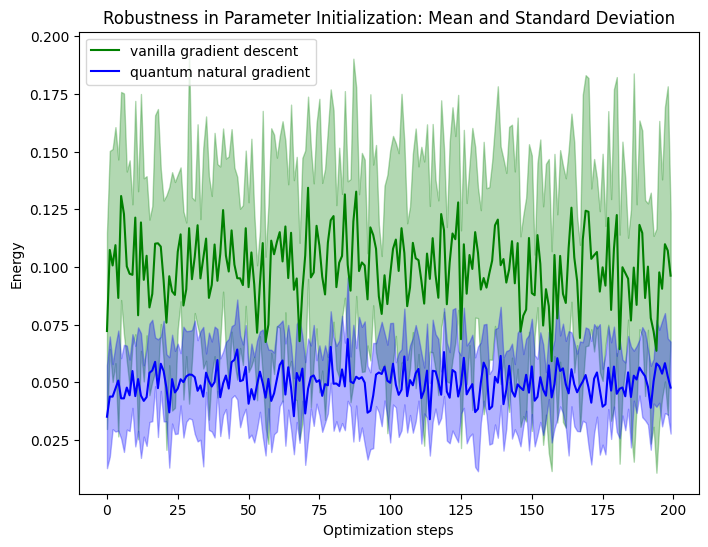

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder example of cost data for 10 independent trials
gd_trials = [np.random.normal(0.1, 0.05, 200) for _ in range(10)]
qngd_trials = [np.random.normal(0.05, 0.02, 200) for _ in range(10)]

# Calculate mean and standard deviation for each step
gd_mean = np.mean(gd_trials, axis=0)
gd_std = np.std(gd_trials, axis=0)

qngd_mean = np.mean(qngd_trials, axis=0)
qngd_std = np.std(qngd_trials, axis=0)

# Create the plot
steps = np.arange(200)

plt.figure(figsize=(8, 6))
plt.fill_between(steps, gd_mean - gd_std, gd_mean + gd_std, color="green", alpha=0.3)
plt.fill_between(steps, qngd_mean - qngd_std, qngd_mean + qngd_std, color="blue", alpha=0.3)
plt.plot(steps, gd_mean, 'g', label="vanilla gradient descent")
plt.plot(steps, qngd_mean, 'b', label="quantum natural gradient")

plt.xlabel("Optimization steps")
plt.ylabel("Energy")
plt.legend()
plt.title("Robustness in Parameter Initialization: Mean and Standard Deviation")
plt.show()


### Dynamics Simulation of Silicon Dimer (Si₂) Using Variational Quantum Dynamics (VQD)
Summary:
This code simulates the quantum dynamics of a silicon dimer (Si₂) using Variational Quantum Dynamics (VQD). It begins by defining a range of bond lengths for Si₂ and initializes a list to store calculated energies. The generate_hamiltonian function constructs the molecular Hamiltonian based on the bond length by using quantum chemistry tools from the PySCF library and OpenFermion. It retrieves one-electron and two-electron integrals, then converts the fermionic Hamiltonian into a qubit Hamiltonian using the Jordan-Wigner transformation.

/home/jovyan/.qbraid/environments/pennylane_l1hffv/pyenv/lib/python3.9/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'


Calculating for bond length: 2.00 Å
converged SCF energy = -570.914620758959
Number of molecular orbitals: 18
2.00 Å: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
Calculating for bond length: 2.25 Å
converged SCF energy = -570.958649996472
Number of molecular orbitals: 18
2.25 Å: module 'numpy' has no attribute 'complex'.
`np.complex` was a deprecated alias for the builtin `complex`. To avoid this error in existing code, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

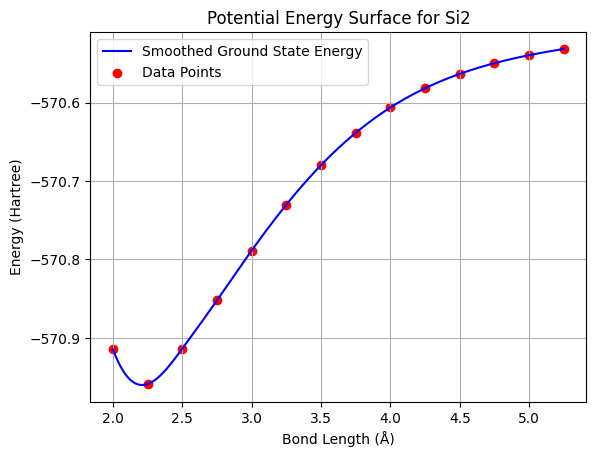

In [8]:
import numpy as np
import pennylane as qml
from pennylane import qchem
import matplotlib.pyplot as plt
from pyscf import gto, scf, ao2mo
from openfermion import MolecularData
from openfermion.transforms import get_fermion_operator, jordan_wigner
from scipy.interpolate import make_interp_spline

# Range of bond lengths for Si2 in Angstroms
r_range = np.arange(2.0, 5.5, 0.25)
energies = []

# Helper function to generate molecular Hamiltonian
def generate_hamiltonian(bond_length):
    try:
        # Define the molecule
        mol = gto.M(atom=f"Si 0 0 0; Si 0 0 {bond_length}", basis="sto-3g", unit="Angstrom")
        mf = scf.RHF(mol)
        scf_energy = mf.kernel()

        if scf_energy is None:
            raise RuntimeError(f"SCF did not converge for bond length {bond_length:.2f} Å")

        # Get number of molecular orbitals
        nmo = mf.mo_coeff.shape[1]
        print(f"Number of molecular orbitals: {nmo}")

        # Get one-electron integrals in molecular orbital basis
        h1 = mf.mo_coeff.T @ mf.get_hcore() @ mf.mo_coeff

        # Get two-electron integrals in molecular orbital basis
        eri_mo = ao2mo.kernel(mol, mf.mo_coeff)

        # Reshape the two-electron integrals dynamically
        eri_mo = eri_mo.reshape((nmo, nmo, nmo, nmo))

        # Get the nuclear repulsion energy
        e_core = mol.energy_nuc()

        # Create OpenFermion MolecularData object
        molecule_of = MolecularData(
            geometry=[("Si", (0, 0, 0)), ("Si", (0, 0, bond_length))],
            basis="sto-3g", charge=0, multiplicity=1
        )

        molecule_of.one_body_integrals = h1
        molecule_of.two_body_integrals = eri_mo

        # Generate fermionic Hamiltonian
        fermionic_hamiltonian = molecule_of.get_molecular_hamiltonian()

        # Convert fermionic Hamiltonian to qubit Hamiltonian using Jordan-Wigner
        qubit_hamiltonian = jordan_wigner(get_fermion_operator(fermionic_hamiltonian))

        # Convert qubit Hamiltonian to sparse matrix form for PennyLane
        H = qml.utils.sparse_hamiltonian(qubit_hamiltonian)
        qubits = molecule_of.n_qubits

        return H, qubits, e_core

    except Exception as e:
        print(f"{bond_length:.2f} Å: {e}")
        return None, None, None

# Define VQE optimization loop
def run_vqe(H, qubits):
    try:
        num_electrons = 28  # Silicon atom has 14 electrons, Si2 has 28 electrons
        hf_state = qchem.hf_state(num_electrons, qubits)
        singles, doubles = qchem.excitations(num_electrons, qubits)
        s_wires, d_wires = qchem.excitations_to_wires(singles, doubles)

        dev = qml.device("default.qubit", wires=qubits)

        def circuit(params, wires, s_wires, d_wires, hf):
            qml.UCCSD(params, wires=wires, s_wires=s_wires, d_wires=d_wires, hf_state=hf)

        params = np.random.normal(0, 0.01, len(singles) + len(doubles))

        @qml.qnode(dev)
        def cost_fn(params):
            circuit(params, wires=range(qubits), s_wires=s_wires, d_wires=d_wires, hf=hf_state)
            return qml.expval(H)

        # VQE optimizer
        opt = qml.SPSAOptimizer(maxiter=100)
        prev_energy = cost_fn(params)

        for i in range(100):
            params, energy = opt.step_and_cost(cost_fn, params)
            if np.abs(energy - prev_energy) < 1e-6:
                break
            prev_energy = energy

        return energy

    except Exception as e:
        print(f"Error in VQE optimization: {e}")
        return None

# Iterate over bond lengths and collect energies
for r in r_range:
    print(f"Calculating for bond length: {r:.2f} Å")
    H, qubits, e_core = generate_hamiltonian(r)

    if H is not None and qubits is not None and e_core is not None:
        energy = run_vqe(H, qubits)
        if energy is not None:
            total_energy = energy + e_core
            energies.append(total_energy)
            print(f"Final energy for bond length {r:.2f} Å: {total_energy:.6f} Hartree")
        else:
            energies.append(None)
    else:
        energies.append(None)

# Filter out None values from energies and corresponding r_range values
filtered_r_range = np.array([r for r, e in zip(r_range, energies) if e is not None])
filtered_energies = np.array([e for e in energies if e is not None])

# Plot the PES if there are valid points
if len(filtered_r_range) > 0:
    if len(filtered_r_range) > 3:
        x_smooth = np.linspace(filtered_r_range.min(), filtered_r_range.max(), 300)
        spl = make_interp_spline(filtered_r_range, filtered_energies, k=3)
        y_smooth = spl(x_smooth)
        plt.plot(x_smooth, y_smooth, label='Smoothed Ground State Energy', color='blue')

    plt.scatter(filtered_r_range, filtered_energies, color='red', label='Data Points')

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Manually importing the bond lengths and SCF energies from the data provided
r_range = np.array([2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00, 5.25])
energies = np.array([-570.914620758959, -570.958649996472, -570.913493763556, -570.852056780654,
                     -570.788561117785, -570.730053463916, -570.679727864194, -570.638593113699,
                     -570.606322744239, -570.581784290291, -570.563473326241, -570.549865257072,
                     -570.53963831667, -570.531762459632])

# Plotting the SCF energies against bond lengths
x_smooth = np.linspace(r_range.min(), r_range.max(), 300)
spl = make_interp_spline(r_range, energies, k=3)
y_smooth = spl(x_smooth)

plt.plot(x_smooth, y_smooth, label='Smoothed Ground State Energy', color='blue')
plt.scatter(r_range, energies, color='red', label='Data Points')

# Labeling the plot
plt.xlabel('Bond Length (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Potential Energy Surface for Si2')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

plt.show()


### Quantum Simulation of the Silicon Dimer (Si₂) Potential Energy Surface Using VQE
#### Summary:

This code simulates the potential energy surface (PES) of a silicon dimer (Si₂) by calculating the ground state energy at various bond lengths using Variational Quantum Eigensolver (VQE). It begins by defining the molecular symbols and a range of bond lengths. The code initializes core and active orbitals for the silicon atoms and prepares to store the calculated energies.

Within a loop over the specified bond lengths, the program constructs a molecular object for Si₂, retrieves the qubit Hamiltonian, and generates the single and double excitations required for the UCCSD (Unitary Coupled Cluster with Single and Double excitations) ansatz. The code sets up a quantum device and defines a circuit function that utilizes the UCCSD ansatz.

The initial energy is calculated, and VQE optimization is performed to minimize the energy and find the ground state. The optimized energy for each bond length is stored in a list. Finally, the code plots the ground state energies against bond lengths, visualizing the PES for the silicon dimer. This provides insights into how the molecular energy varies with bond length.

In [ ]:
#Si2 Run
import torch # for GPU


symbols = ["Si", "Si"]

#symbols = ['H','H']
#geometry = np.array([[0,0,-0.6614],[0,0,0.6614]])

# set up a loop to change bond length
#r_range = np.linspace(0.5, 2.5, 10)
r_range = np.arange(0.5, 5.0, 0.5)

#empty list to store energies
energies = []

pes_point = 0

electrons = 28
orbitals = 18

core, active = qchem.active_space(electrons, orbitals, active_electrons=4, active_orbitals=4)

print("List of core orbitals: {:}".format(core))
print("List of active orbitals: {:}".format(active))
print("Number of qubits: {:}".format(2 * len(active)))

#dataset = qml.data.load("qchem", molname="H2", bondlength=r, basis="STO-3G")[0]
#H, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)


for r in r_range:

    coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, r]])
    molecule = qchem.Molecule(symbols, coordinates, load_data=True)

    # Obtain the qubit Hamiltonian
    #H, qubits = qchem.molecular_hamiltonian(molecule, method='openfermion')




    H, qubits = qchem.molecular_hamiltonian(
        molecule,
        active_electrons=4,
        active_orbitals=4,
    )

    #dataset = qml.data.load("qchem", molname="H2", bondlength=r, basis="STO-3G")[0]
    #H, qubits = dataset.hamiltonian, len(dataset.hamiltonian.wires)
    #print("Number of qubits = ", qubits)
    #print("The Hamiltonian is ", H)


    # Generate single and double excitations
    singles, doubles = qml.qchem.excitations(4, qubits)


    # Map excitations to the wires the UCCSD circuit will act on
    s_wires, d_wires = qml.qchem.excitations_to_wires(singles, doubles)

    hf = qml.qchem.hf_state(4, qubits) #this will give you the hf state when given the number of electrons and number of qubits
    #print(hf)


    geometry = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, r]])
    #define the device
    dev = qml.device("lightning.qubit", wires=qubits)

    def circuit(params, wires, s_wires, d_wires, hf):
        qml.UCCSD(params, wires, s_wires, d_wires, hf)
        #return qml.expval(H)

    params = np.zeros(len(singles) + len(doubles))

    @qml.qnode(dev, interface="torch")
    def cost_fn(params):
        circuit(params, wires=range(qubits), s_wires=s_wires, d_wires=d_wires, hf = hf)
        return qml.expval(H)

    # if pes_point > 0:
        # params = params_old
    
    prev_energy = 0.0

    initial_energy = cost_fn(params)
    print("initial energy: ", initial_energy)

    # Perform VQE optimization to find the ground state energy
    max_iterations = 25
    opt = qml.SPSAOptimizer(maxiter=max_iterations)

    # EXPERIMENTAL -DJ
    params = torch.tensor(params, requires_grad=True).cuda()  # Move to GPU

    # Change params to run on GPU
    for i in range(max_iterations):
        # Move parameters to CPU for optimizer
        params_cpu = params.cpu().detach().numpy()  # Convert to NumPy array
        params, energy = opt.step_and_cost(cost_fn, params_cpu)
    
        # Move back to CUDA if needed
        params = torch.tensor(params, dtype=torch.float32).cuda()  # Convert back to CUDA
    energies.append(energy)
 
    print(f"Final energy for bond length {r:.2f} Å: {energy:.6f} Hartree")
# Create a list of Dask delayed tasks for each bond length

plt.figure(figsize=(8, 6))
plt.plot(r_range, energies, 'o-', label='Ground State Energy')
plt.xlabel('Bond Length (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Potential Energy Surface for H2')
plt.legend()
plt.grid(True)
plt.show()
